In [969]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import keras
import sklearn
from sklearn.model_selection import train_test_split

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)


In [970]:
!rm -rf ./logs/

In [971]:
data=pd.read_csv('Parametros_de_todos.csv')
data

In [973]:
dataset=data.values
dataset

In [975]:
x=dataset[:,0:25]
y=dataset[:,26]

In [1001]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

# Model

In [1004]:
# %load_ext tensorboard

In [1003]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


In [1005]:
model = Sequential([
    Dense(32, activation='relu',  kernel_regularizer=regularizers.l2(0.01), input_shape=(25,)),
    Dropout(0.3),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
#     Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.3),
# #     Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.3),
#   Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')])
    
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.summary()


In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=32, epochs=10000,
          validation_data=(x_test, y_test)),
           callbacks=[tensorboard_callback])

In [996]:
 print("Perda: " + str(100*(model.evaluate(x_test,y_test)[0]))+" %")

26/26 [==============================] - 0s 79us/step
Perda: 141.0605788230896 %


In [997]:
 print("Precisão: " + str(100*(model.evaluate(x_test,y_test)[1]))+" %")

26/26 [==============================] - 0s 41us/step
Precisão: 92.30769276618958 %


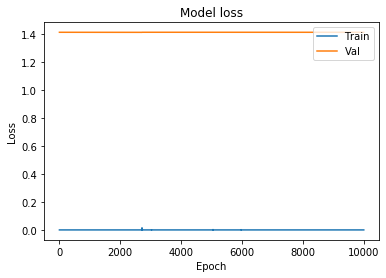

In [998]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.savefig("Perdas.png")
plt.show()

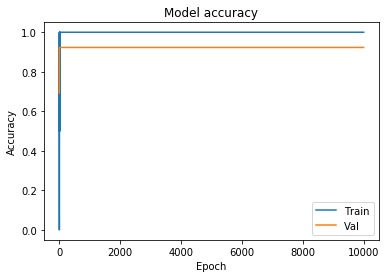

In [989]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Precisao.png")
plt.show()

In [990]:
model.save("Modelo_1")

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 32)                832       
_________________________________________________________________
dropout_49 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 100)               3300      
_________________________________________________________________
dropout_50 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 101       
Total params: 4,233
Trainable params: 4,233
Non-trainable params: 0
_________________________________________________________________


In [992]:
# %tensorboard --logdir logs

In [993]:
# from tensorboard import notebook
# notebook.list()

In [ ]:
# notebook.display(port=6006, height=1000) 